In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# 데이터 로드
df = pd.read_csv('place_reviews.csv')

# 불용어 목록 정의
stopwords = set(["의", "가", "이", "은", "들", "는", "좀", "잘", "걍", "과", "도", "를", "으로", "자", "에", "와", "한", "하다", "진짜", "여기", "너무", "youtu", "https", "좋아요", "좋고", "좋습니다",
                 "없어요", "엄청", "많이", "정말", "ㅎㅎ " ,"매우", "좋음", "코로나", "없음", "갑니다", "ㅋㅋ", "ㅠㅠ",
                 "같아요", "많고", "매우", "좋았어요", "있어서", "좋은", "있는"])

# 텍스트 데이터 전처리
def preprocess(text):
    tokens = text.split()
    tokens = [token for token in tokens if token not in stopwords]
    return ' '.join(tokens)

df['preprocessed_review'] = df['review'].apply(preprocess)

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000, use_idf=True)
tfidf_matrix = vectorizer.fit_transform(df['preprocessed_review'])

# NMF를 사용한 토픽 모델링
n_topics = 50
nmf = NMF(n_components=n_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf_matrix)

# 토픽별 단어 출력
feature_names = vectorizer.get_feature_names_out()
n_top_words = 2

topics = []
for topic_idx, topic in enumerate(nmf.components_):
    topic_keywords = " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    topics.append(topic_keywords)
    print(f"Topic #{topic_idx + 1}: {topic_keywords}")
    print()

# 리뷰별 토픽 분포
topic_distribution = nmf.transform(tfidf_matrix)

# 각 관광지별로 가장 높은 토픽 점수를 가지는 토픽을 선택
place_topic = {}
for index, row in df.iterrows():
    place_name = row['place_name']
    topic_score = topic_distribution[index]
    dominant_topic = np.argmax(topic_score)
    
    if place_name not in place_topic:
        place_topic[place_name] = (dominant_topic, topic_score[dominant_topic])

    if topic_score[dominant_topic] > place_topic[place_name][1]:
        place_topic[place_name] = (dominant_topic, topic_score[dominant_topic])

# 관광지별 대표 토픽(단어) 2개 출력
for place_name, (dominant_topic, _) in place_topic.items():
    print(f"{place_name}: {topics[dominant_topic]}")


C:\Users\lhe33\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(


Topic #1: 힘든 먹었습니다

Topic #2: youtu https

Topic #3: 좋아요 아이들

Topic #4: 그냥 한번은

Topic #5: 최고 사장님

Topic #6: ㅎㅎ 같아요

Topic #7: 맛있어요 베이글

Topic #8: 제주도 제일

Topic #9: 오름 작은

Topic #10: 뷰가 좋다

Topic #11: 산책하기 가볍게

Topic #12: 좋았습니다 왔는데

Topic #13: 생각보다 넓어서

Topic #14: 가성비 호텔

Topic #15: 바다 좋습니다

Topic #16: 친절하시고 사장님

Topic #17: 많아서 사람이

Topic #18: 사진 찍기

Topic #19: 좋네요 그런지

Topic #20: 가면 날씨

Topic #21: 뷰는 조금

Topic #22: 입장료 비해

Topic #23: 있어요 귀여운

Topic #24: 다시 날씨

Topic #25: 수영장 호텔

Topic #26: 추천 보러

Topic #27: 재밌게 갑니다

Topic #28: 갔는데 하고

Topic #29: 아주 작은

Topic #30: 제주 여행

Topic #31: 좋았어요 다음에

Topic #32: 다른 비해

Topic #33: 커피 맛있음

Topic #34: 시간 즐거운

Topic #35: 넓고 주차장

Topic #36: 예뻐요 정상에서

Topic #37: 깨끗하고 물도

Topic #38: 사람 많아요

Topic #39: 직원들 친절하고

Topic #40: 좋았음 분위기

Topic #41: 카페 분위기

Topic #42: 아이들이 좋아해요

Topic #43: 재밌어요 카트

Topic #44: 없고 사람도

Topic #45: 화장실 좋은데

Topic #46: 관리가 친절하세요

Topic #47: 아름다운 곳입니다

Topic #48: 이뻐요 아이들

Topic #49: and the

Topic #50: 있고 카페도



C:\Users\lhe33\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(


이호테우해수욕장: 좋았음 분위기
남원큰엉해변: 없고 사람도
함덕해수욕장: 아름다운 곳입니다
협재해수욕장: 바다 좋습니다
용머리해안: youtu https
황우지해안: 예뻐요 정상에서
삼양해수욕장: youtu https
행원해변: 이뻐요 아이들
논짓물해변: 바다 좋습니다
검멀레해변: 추천 보러
몽돌해변: 바다 좋습니다
세기알해변: 제주 여행
신흥해수욕장: youtu https
하모해변: 화장실 좋은데
알작지해변: 좋아요 아이들
함덕해수욕장 주차장: 넓고 주차장
협재해수욕장 주차장: 넓고 주차장
협재해수욕장 캠핑장: 바다 좋습니다
곽지해수욕장 주차장: 넓고 주차장
삼양해수욕장 정자: 산책하기 가볍게
삼양해수욕장 공영주차장: 힘든 먹었습니다
하도해수욕장 화장실: 관리가 친절하세요
이호테우해수욕장 화장실: youtu https
비자림: 산책하기 가볍게
서귀포자연휴양림: 산책하기 가볍게
절물자연휴양림: 산책하기 가볍게
붉은오름자연휴양림: 산책하기 가볍게
교래자연휴양림: 넓고 주차장
한남시험림탐방: 좋았어요 다음에
제주시험림: 좋네요 그런지
설록다원도순: 좋아요 아이들
서귀다원: 없고 사람도
녹차동굴: 제주도 제일
올레길 14-1코스(저지-서광 올레): 오름 작은
항파두리 항몽유적지: 이뻐요 아이들
이중섭거리: 좋아요 아이들
유채꽃프라자: 뷰는 조금
소천지: 최고 사장님
오늘은카트레이싱: 아주 작은
성읍랜드: 재밌게 갑니다
김경숙해바라기농장: 좋았습니다 왔는데
올티스: 시간 즐거운
남송이오름: youtu https
제주농업생태원: 있어요 귀여운
국립제주박물관: 직원들 친절하고
오설록티뮤지엄: 예뻐요 정상에서
세계자동차&피아노박물관: 아름다운 곳입니다
제주항공우주박물관: 좋았습니다 왔는데
박물관은살아있다 제주중문점: 그냥 한번은
제주해양동물박물관: 친절하시고 사장님
그리스신화박물관: 관리가 친절하세요
초콜릿박물관: and the
제주 세계자연유산센터: 다른 비해
테디베어뮤지엄 제주점: 추천 보러
조안베어뮤지엄: 많아서 사람이
비오토피아 수풍석박물관: 제주도 제일
제주신영영

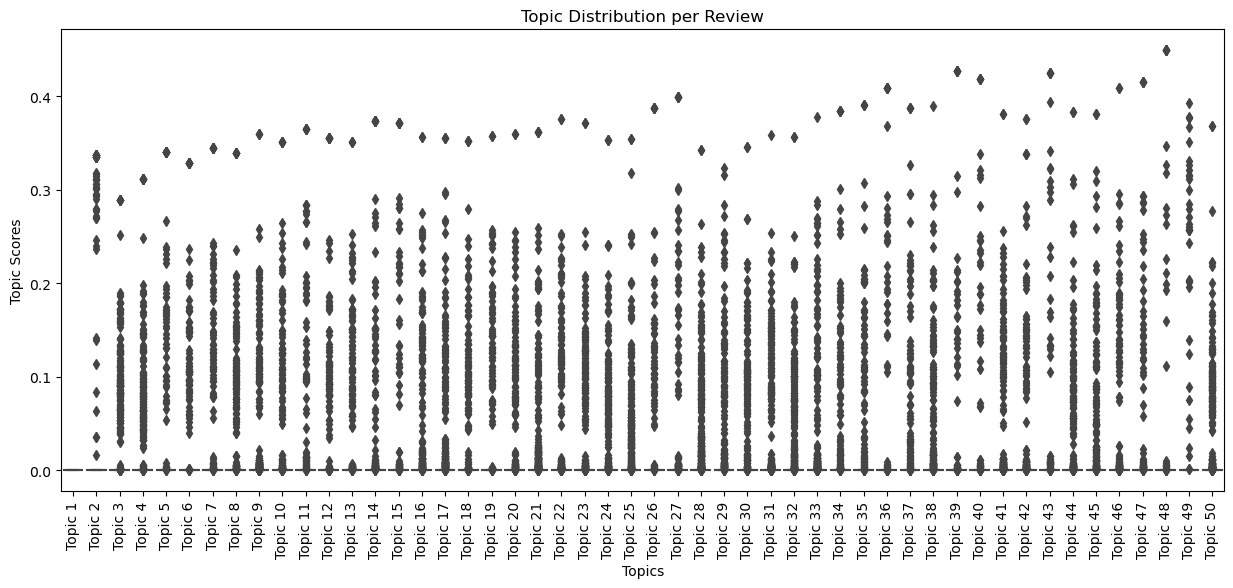

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# topic_distribution을 데이터프레임으로 변환
topic_distribution_df = pd.DataFrame(topic_distribution, columns=[f'Topic {i+1}' for i in range(n_topics)])

# 토픽 분포 시각화
plt.figure(figsize=(15, 6))
sns.boxplot(data=topic_distribution_df)
plt.title('Topic Distribution per Review')
plt.xlabel('Topics')
plt.ylabel('Topic Scores')
plt.xticks(rotation=90)
plt.show()

In [4]:
topic_distribution_df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,...,Topic 41,Topic 42,Topic 43,Topic 44,Topic 45,Topic 46,Topic 47,Topic 48,Topic 49,Topic 50
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.000000,0.0,0.0,0.328712,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.001074,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.199481,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4186,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011417
4187,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4188,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.005544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4189,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
